# 第 4 章第 1 节-使用 k 近邻算法进行分类

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

生成测试数据。

In [2]:
from sklearn.datasets.samples_generator import make_blobs

centers = [[-2, 2], [2, 2], [0, 4]]
X, y = make_blobs(
    n_samples=60, centers=centers, random_state=0, cluster_std=0.60)

可视化数据。

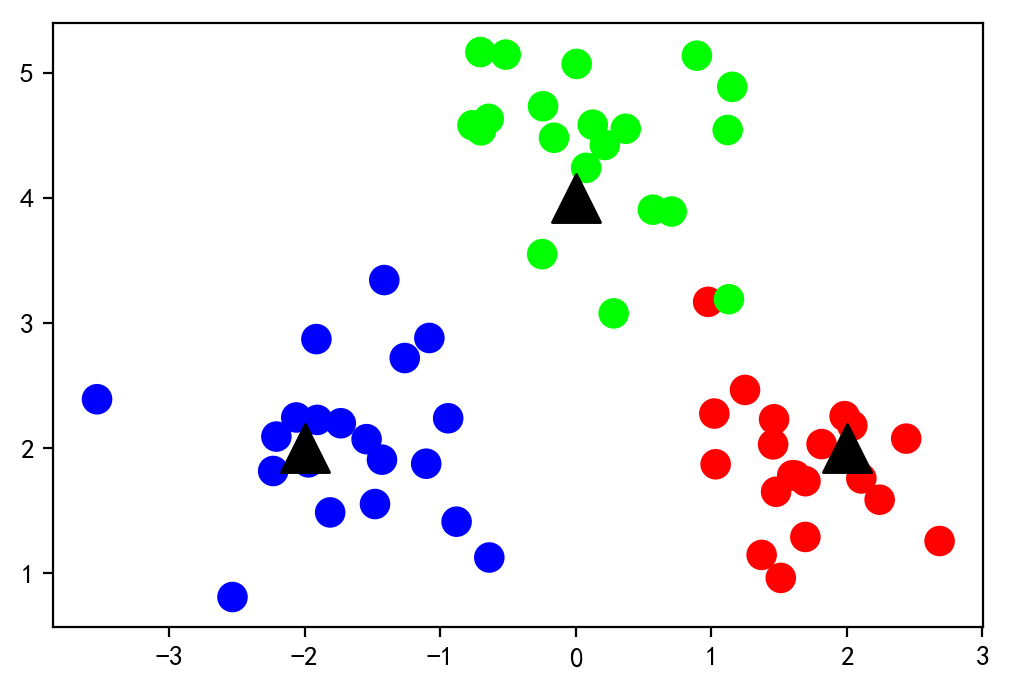

In [3]:
plt.figure(dpi=100)
# 画出样本点
plt.scatter(X[:, 0], X[:, 1], c=y, s=100, cmap='brg')

# 画出中心点
c = np.array(centers)
plt.scatter(c[:, 0], c[:, 1], s=300, marker='^', c='black')
plt.show()

超参数 $k=5$。 

In [4]:
from sklearn.neighbors import KNeighborsClassifier

# 模型训练
k = 5
clf = KNeighborsClassifier(n_neighbors=k)
clf.fit(X, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

预测。

In [5]:
# 虽然只有 1 个测试数据，但是也要写成二维矩阵的样子
X_sample = [[0, 2]]
y_sample = clf.predict(X_sample)
y_sample

array([0])

看看它的邻居。

In [6]:
# 返回距离和索引
neighbors = clf.kneighbors(X_sample, return_distance=True)
neighbors

(array([[0.97169784, 1.0395278 , 1.05701702, 1.05893391, 1.08106267]]),
 array([[16, 20, 48,  6, 23]]))

In [7]:
# 预测点的 5 个最近的邻居
X[neighbors[1]]

array([[[-0.94156859,  2.24009433],
        [ 1.03166129,  1.87235583],
        [-0.87946521,  1.41363327],
        [ 1.02188099,  2.27766935],
        [-0.63814723,  1.1273806 ]]])

In [8]:
# 0 最多，所以预测是 0 类
y[neighbors[1]]

array([[0, 1, 0, 1, 0]])

In [9]:
X_sample[0][0]

0

In [10]:
neighbors[1]

array([[16, 20, 48,  6, 23]])

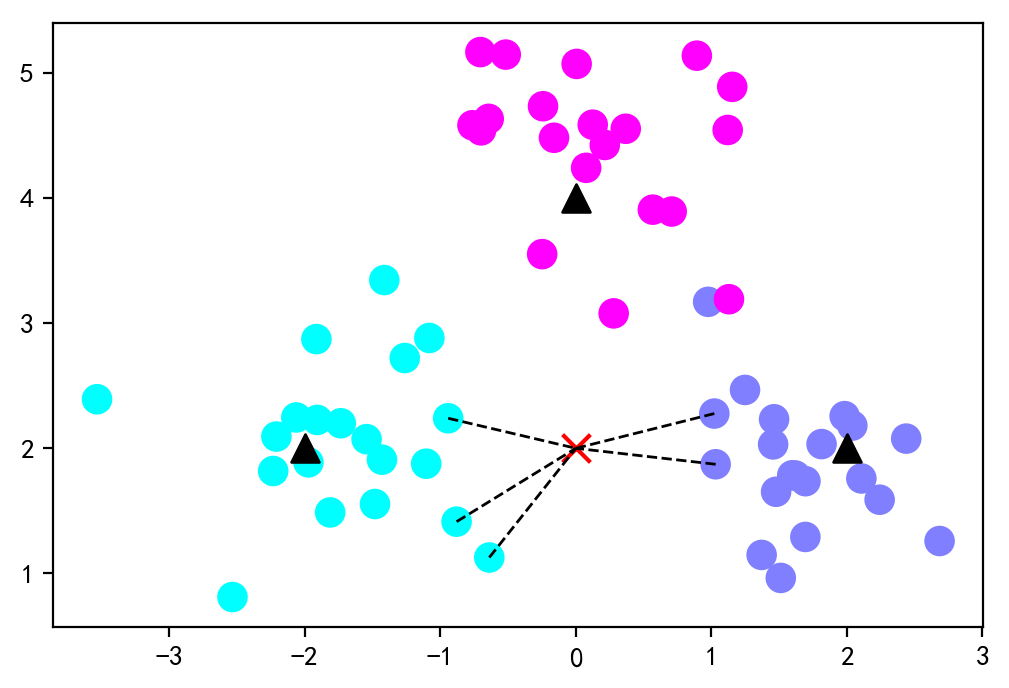

In [11]:
plt.figure(dpi=100)
# 样本
plt.scatter(X[:, 0], X[:, 1], c=y, s=100, cmap='cool')
# 中心点
plt.scatter(c[:, 0], c[:, 1], s=100, marker='^', c='k')
# 待预测的点
plt.scatter(
    X_sample[0][0], X_sample[0][1], marker="x", c='r', s=100, cmap='cool')

# 预测点与距离最近的 5 个样本的连线
for i in neighbors[1][0]:
    plt.plot(
        [X[i][0], X_sample[0][0]], [X[i][1], X_sample[0][1]],
        'k--',
        linewidth=1)

plt.show()

$k$ 值的选择可以通过网格搜索。